In [1]:
from sklearn import datasets, metrics, linear_model, model_selection, preprocessing;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
random_state = 1337

# *ALL DATASETS NAMES:*

#### **GET LARGE DATASETS:**

"fetch_20newsgroups",
"fetch_20newsgroups_vectorized",
"fetch_lfw_pairs",
"fetch_lfw_people",
"fetch_olivetti_faces",
"fetch_species_distributions",
"fetch_california_housing",
"fetch_covtype",
"fetch_rcv1",
"fetch_kddcup99",
"fetch_openml"

#### **LOAD DEFAULT DATASETS:**

"load_boston",
"load_diabetes",
"load_digits",
"load_files",
"load_iris",
"load_breast_cancer",
"load_linnerud",
"load_sample_image",
"load_sample_images",
"load_svmlight_file",
"load_svmlight_files",
"load_wine"

#### **MAKE CUSTOM DATASETS:**

"make_biclusters",
"make_blobs",
"make_circles"
"make_classification",
"make_checkerboard",
"make_friedman1",
"make_friedman2",
"make_friedman3",
"make_gaussian_quantiles",
"make_hastie_10_2",
"make_low_rank_matrix",
"make_moons",
"make_multilabel_classification",
"make_regression",
"make_s_curve",
"make_sparse_coded_signal",
"make_sparse_spd_matrix",
"make_sparse_uncorrelated",
"make_spd_matrix",
"make_swiss_roll"

## **Sintetic data visualization:**

In [3]:
x, y = datasets.make_regression(n_samples=10000, n_features=20, n_informative=15, n_targets=5, bias=10.0, noise=50.0, random_state=random_state)
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1, random_state=random_state)
X_test, y_test

(array([[-2.05212886, -3.33587434, -0.09294302, ..., -1.36724647,
         -0.34659946,  0.95984597],
        [-0.59103601, -0.21999559, -0.92124736, ..., -0.99218366,
         -1.27037901, -1.60220085],
        [-0.05152553, -0.3865021 , -1.03646084, ...,  1.36068975,
         -0.57590826,  0.78006683],
        ...,
        [ 0.55302363, -0.66963058,  0.66446375, ..., -0.77779249,
          0.81649844, -0.38187201],
        [ 0.2039315 ,  0.65514291, -0.1860766 , ...,  0.90002824,
          0.02108897,  0.92180474],
        [-0.03151757,  0.29045485, -0.22709462, ..., -0.02718591,
          0.61457772,  0.29815221]]),
 array([[-111.43859658,   18.22366587,  252.71600531, -265.37985168,
         -116.34780395],
        [-298.55100353, -574.4448615 , -296.59761602, -298.63368086,
         -413.12910637],
        [   9.74846565, -364.19390783,  -48.3449171 , -255.97104766,
         -198.716581  ],
        ...,
        [-109.61209853, -193.17950262,  -11.58732743, -161.74235689,
         

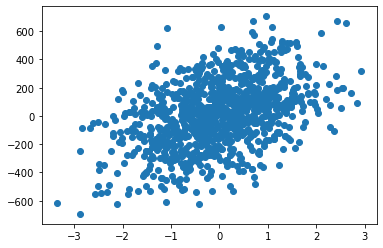

In [4]:
plt.scatter(X_test[:, 0], y_test[:, 0])

### ***Linear models test***

#### **Linear regression**

In [5]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train[:, 0])
print(f"model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}")

model coefficients are: 
[9.98461143e+01 5.84990999e+01 2.26864093e+01 4.08794473e-01
 8.97302973e+01 3.40855046e+01 1.96312773e+01 7.39503897e+01
 2.57929234e+01 6.20743549e-01 3.06592808e+01 2.88087811e+00
 6.66264966e+01 8.99957655e+01 3.86195000e+01 3.18411495e+01
 5.71828408e-01 9.28463173e-02 2.97243068e-02 8.76472116e+01]
 Intercept of this model is: 10.48742994215368
 Validation score is: 0.9538205449971037


#### **Ridge**

In [6]:
model = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 1300))
model.fit(X_train, y_train[:, 0])
print(f"model coefficients are: \n{model.coef_}\n Alpha of this model is: {model.alpha_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}")

model coefficients are: 
[9.98348335e+01 5.84923177e+01 2.26842190e+01 4.08636828e-01
 8.97206040e+01 3.40816242e+01 1.96289512e+01 7.39422415e+01
 2.57899283e+01 6.20536809e-01 3.06563034e+01 2.88100148e+00
 6.66186230e+01 8.99856949e+01 3.86146901e+01 3.18376142e+01
 5.71906719e-01 9.29282872e-02 2.97068497e-02 8.76370088e+01]
 Alpha of this model is: 1.0106922549010011
 Intercept of this model is: 10.487636140433747
 Validation score is: 0.9538194296102513


#### **Lasso**

In [7]:
model = linear_model.LassoCV(alphas=np.linspace(0.001, 100, 1000))
model.fit(X_train, y_train[:, 0])
print(f"model coefficients are: \n{model.coef_}\n Alpha of this model is: {model.alpha_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}")

model coefficients are: 
[99.74784347 58.39137625 22.58672542  0.30213792 89.63948143 33.98279618
 19.52721151 73.85060818 25.69059989  0.51855857 30.5599517   2.79004251
 66.5193107  89.8964495  38.51211179 31.73574181  0.47418983  0.
  0.         87.54385507]
 Alpha of this model is: 0.1010990990990991
 Intercept of this model is: 10.491379530980227
 Validation score is: 0.9538011291812765


#### **Multitask Lasso**

In [8]:
model = linear_model.MultiTaskLassoCV(alphas=np.linspace(0.01, 100, 1000))
model.fit(X_train, y_train)
print(f"model coefficients are: \n{model.coef_}\n Alpha of this model is: {model.alpha_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test)}")

model coefficients are: 
[[ 9.96650854e+01  5.83439445e+01  2.26337965e+01  2.64113965e-01
   8.95168251e+01  3.39938502e+01  1.95776215e+01  7.37656406e+01
   2.57118511e+01  4.48083339e-01  3.05911191e+01  2.88937923e+00
   6.64915300e+01  8.98197328e+01  3.84869418e+01  3.17512687e+01
   4.36833624e-01  5.11549251e-02  1.79991625e-02  8.74300525e+01]
 [ 9.08026289e+01  4.85599047e+01  8.35471075e+01 -3.12085217e-01
   4.15727309e+01  9.41520956e+01  6.89294896e+01  3.75279767e+01
   7.78906456e+01  3.01169538e-01  9.45500472e+01  7.51084251e+01
   9.68333870e+01  2.84736466e+01  5.42621044e+01  9.48406324e+01
   2.54806023e-02  3.10702016e-01 -3.97181726e-01  3.36154266e+01]
 [ 9.54341101e+00  7.79912047e+00  4.70439891e+01 -1.43946108e-02
   1.70185896e+01  5.68887802e+01  3.32973220e+01  1.75596613e+01
   7.75324667e+00 -8.64241224e-02  4.98889935e+01  7.25818030e+01
   6.49275325e+01  8.10314482e+01  1.14419510e+01  3.30189030e+01
  -3.28149816e-01  2.84071195e-03 -1.38916995e-01

#### **Elastic net**

In [9]:
model = linear_model.ElasticNetCV(alphas=np.linspace(0.01, 100, 1000), l1_ratio=np.linspace(0.01, 0.99, 100))
model.fit(X_train, y_train[:, 0])
print(f"""model coefficients are: \n{model.coef_}\n Alpha of this model is: {model.alpha_}\n L1_ratio is: {model.l1_ratio_}
    Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}""")

model coefficients are: 
[9.98264954e+01 5.84825501e+01 2.26745535e+01 3.98222469e-01
 8.97126969e+01 3.40718545e+01 1.96191114e+01 7.39333571e+01
 2.57802598e+01 6.10545184e-01 3.06469024e+01 2.87212078e+00
 6.66090421e+01 8.99771280e+01 3.86047407e+01 3.18275267e+01
 5.62294674e-01 8.28361668e-02 1.95409333e-02 8.76279998e+01]
 Alpha of this model is: 0.01
 L1_ratio is: 0.99
    Intercept of this model is: 10.487994625805943
 Validation score is: 0.9538172349120554


#### **Multitask elastic net**

In [10]:
model = linear_model.MultiTaskElasticNetCV(alphas=np.logspace(-6, 6, 50), l1_ratio=np.logspace(-6, 0, 50));
model.fit(X_train, y_train);
print(f"""model coefficients are: \n{model.coef_}\n Alpha of this model is: {model.alpha_}\n L1_ratio is: {model.l1_ratio_}
    Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test)}""");

model coefficients are: 
[[ 9.97036248e+01  5.83769826e+01  2.26449985e+01  2.94712630e-01
   8.95622760e+01  3.40133667e+01  1.95890466e+01  7.38049711e+01
   2.57291179e+01  4.84714052e-01  3.06056394e+01  2.88757380e+00
   6.65202653e+01  8.98572176e+01  3.85151648e+01  3.17704138e+01
   4.65654613e-01  6.04834124e-02  2.03469876e-02  8.74762845e+01]
 [ 9.08365242e+01  4.85880656e+01  8.35918710e+01 -3.46123525e-01
   4.15931292e+01  9.42067420e+01  6.89674590e+01  3.75462644e+01
   7.79433030e+01  3.24141688e-01  9.45999792e+01  7.51400762e+01
   9.68749118e+01  2.84847372e+01  5.42997371e+01  9.48978923e+01
   2.57208478e-02  3.72271937e-01 -4.39511192e-01  3.36319376e+01]
 [ 9.54702923e+00  7.80471648e+00  4.70687999e+01 -1.55228381e-02
   1.70264534e+01  5.69214577e+01  3.33154056e+01  1.75675270e+01
   7.75838295e+00 -9.36935902e-02  4.99145496e+01  7.26137045e+01
   6.49549899e+01  8.10649603e+01  1.14499672e+01  3.30389039e+01
  -3.50889003e-01  4.18795851e-03 -1.53674816e-01

#### **Least angles regression**

In [11]:
model = linear_model.Lars(n_nonzero_coefs=15, normalize=True)
model.fit(X_train, y_train[:, 0])
print(f"""model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}""");

model coefficients are: 
[99.24193537 57.85348194 22.08921582  0.         89.17163091 33.46778454
 19.00157708 73.34334158 25.17184458  0.         30.06291698  2.32262704
 65.98008774 89.39879713 37.96150651 31.21616799  0.          0.
  0.         87.02536028]
 Intercept of this model is: 10.516735053683576
 Validation score is: 0.953587926419933


#### **LARS Lasso**

In [12]:
model = linear_model.LassoLarsCV(cv=5)
model.fit(X_train, y_train[:, 0])
print(f"""model coefficients are: \n{model.coef_}\n Alpha of this model is: {model.alphas_}\n
    Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}""");

model coefficients are: 
[99.75237879 58.39672942 22.59157575  0.30742542 89.64337068 33.98722991
 19.53189953 73.85549302 25.69462336  0.52304824 30.56406268  2.79401357
 66.52473704 89.90174323 38.51645266 31.74004724  0.47784559  0.
  0.         87.54918414]
 Alpha of this model is: [1.04889321e+00 9.80645582e-01 9.62477807e-01 9.00169132e-01
 7.94147422e-01 6.76189365e-01 5.99276795e-01 3.85290057e-01
 3.56183285e-01 3.36045970e-01 3.33321025e-01 2.66432613e-01
 2.47315274e-01 2.02088001e-01 3.23545985e-02 6.46543085e-03
 6.15217265e-03 4.09934926e-03 1.01761665e-03]

    Intercept of this model is: 10.491223247598993
 Validation score is: 0.9538019786986702


#### **Orthogonal matching pursuit**

In [13]:
model = linear_model.OrthogonalMatchingPursuitCV(cv=5)
model.fit(X_train, y_train[:, 0])
print(f"""model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}""");

model coefficients are: 
[100.65606905   0.           0.           0.          89.87349903
   0.           0.          73.8425969    0.           0.
   0.           0.           0.          90.13357435   0.
   0.           0.           0.           0.          86.91134716]
 Intercept of this model is: 11.74522356700868
 Validation score is: 0.718004338809189


#### **Bayesian ridge regression**

In [14]:
model = linear_model.BayesianRidge()
model.fit(X_train, y_train[:, 0])
print(f"model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}");

model coefficients are: 
[9.98357678e+01 5.84928794e+01 2.26844004e+01 4.08649883e-01
 8.97214068e+01 3.40819456e+01 1.96291438e+01 7.39429164e+01
 2.57901763e+01 6.20553929e-01 3.06565500e+01 2.88099127e+00
 6.66192751e+01 8.99865290e+01 3.86150885e+01 3.18379070e+01
 5.71900235e-01 9.29214996e-02 2.97082961e-02 8.76378538e+01]
 Intercept of this model is: 10.487619063117863
 Validation score is: 0.9538195229035071


#### **Bayesional automatic revealence determination regression**

In [15]:
model = linear_model.ARDRegression()
model.fit(X_train, y_train[:, 0])
print(f"""model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}""");

model coefficients are: 
[9.98439185e+01 5.84901017e+01 2.26720549e+01 1.64546251e-03
 8.97470682e+01 3.40799330e+01 1.96123886e+01 7.39415213e+01
 2.57845582e+01 1.66946145e-01 3.06453938e+01 2.80438360e+00
 6.66198903e+01 8.99871826e+01 3.86054450e+01 3.18271359e+01
 9.32467477e-02 3.08213449e-04 3.48212185e-05 8.76457136e+01]
 Intercept of this model is: 10.487286129184547
 Validation score is: 0.95383897307287


#### **Logistic regression**

In [16]:
#model = linear_model.LogisticRegression()

#lab = preprocessing.StandardScaler()
#y_transformed = lab.fit_transform(y_train[:, 0])

#model.fit(X_train, y_transformed)
#print(f"model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, lab.transform(y_test[:, 0]))}");

#### **Tweddie regression**

In [17]:
model = linear_model.TweedieRegressor()
model.fit(X_train, y_train[:, 0])
print(f"""model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}""");

model coefficients are: 
[ 4.97969708e+01  2.87887603e+01  1.21273565e+01 -2.43615720e-02
  4.57260149e+01  1.69402429e+01  9.55971066e+00  3.73399369e+01
  1.26968636e+01  2.08800248e-02  1.63676097e+01  2.42524023e+00
  3.24501086e+01  4.51121675e+01  1.82453397e+01  1.60010483e+01
  6.20191910e-01  2.46686779e-01 -3.49868987e-02  4.30525620e+01]
 Intercept of this model is: 11.40034249185061
 Validation score is: 0.7115600484292994


#### **Passive Agressive regressor**

In [18]:
model = linear_model.PassiveAggressiveRegressor(max_iter=100, random_state=random_state, tol=1e-3)
model.fit(X_train, y_train[:, 0])
print(f"""model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}""");

model coefficients are: 
[98.60816365 49.54357419 22.20019978 -3.86557768 89.70249546 16.53534524
 30.02382809 81.11848214 31.76280703 -9.58712426 31.87652278 -2.0934707
 67.40088524 93.57440113 41.24872718 30.23763406 -2.65449934 -5.42105317
  3.3840442  95.48938544]
 Intercept of this model is: [12.44244093]
 Validation score is: 0.9424317108559357


#### **Quantile regressor**

In [ ]:
#model = linear_model.QuantileRegressor(quantile=0.8)
#model.fit(X_train, y_train[:, 0])
#print(f"""model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}""");

#### **Huber Regressor**

In [20]:
model = linear_model.HuberRegressor()
model.fit(X_train, y_train[:, 0])
print(f"model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}");

model coefficients are: 
[99.33716951 58.48366502 22.4171353   0.29076343 89.56774384 34.18711101
 20.03648754 73.87420239 25.54315813  0.5966268  30.59262095  2.90256306
 66.79871617 89.9391637  38.98094361 32.00154165  0.84111498  0.23145349
  0.11698505 87.61830018]
 Intercept of this model is: 10.628599972481899
 Validation score is: 0.95386162197819


#### **Theil Sen Regressor**

In [21]:
model = linear_model.TheilSenRegressor()
model.fit(X_train, y_train[:, 0])
print(f"model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}");

model coefficients are: 
[1.00315161e+02 5.80873978e+01 2.22534602e+01 1.50054147e+00
 8.93551236e+01 3.44393244e+01 1.97168282e+01 7.28889451e+01
 2.50716865e+01 1.61764561e+00 3.13428133e+01 3.71483034e+00
 6.74310459e+01 9.08721555e+01 3.90890237e+01 3.22885729e+01
 5.63515345e-02 3.33736584e-01 2.71732967e-01 8.87084779e+01]
 Intercept of this model is: 10.791886292913313
 Validation score is: 0.9536176486228678


#### **Perceptron**

In [ ]:
# ONLY FOR CLASSIFICATION
#model = linear_model.Perceptron(tol=1e-3, random_state=random_state)
#model.fit(X_train, y_train[:, 0])
#print(f"model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}");

#### **Stochastic gradient descent regressor**

In [23]:
model = linear_model.SGDRegressor()
model.fit(X_train, y_train[:, 0])
print(f"model coefficients are: \n{model.coef_}\n Intercept of this model is: {model.intercept_}\n Validation score is: {model.score(X_test, y_test[:, 0])}");

model coefficients are: 
[99.73128248 58.53319623 23.87677241  0.42647333 89.46314075 34.40507959
 18.80021428 74.19942364 25.50200068  0.80604474 30.56430427  4.05033004
 66.03690095 89.71736109 38.79584218 32.0339672  -0.35871333 -1.38182132
 -1.10335964 86.01030279]
 Intercept of this model is: [10.73822499]
 Validation score is: 0.9534175105133446


#### **Robust linear estimator fitting**

In [25]:
model = linear_model.RANSACRegressor(random_state=random_state)
model.fit(X_train, y_train[:, 0])
print(f"Validation score is: {model.score(X_test, y_test[:, 0])}");

Validation score is: 0.9518770176999116
